# Capstone Project - Bank Marketing

# Part 1- Data and Problem Statement

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
Please refer the file 'bank_additional_names' for detailed information about the data set.
The data set has several categorical variables.There are multiple ways to convert the categorical data - 1) using pd.get dummies and 2) using 'replace' , 'map' etc. I used one hot encoding to convert the categorical variables.

The project begins with exploratory data analysis to establish relationship between different variables.

This dataset is sourced from kaggle.com

Original Citation:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001


# PART 2 - EDA
In this section I have tried to visually represent the data to get a feel about different set of variables.

In [255]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [184]:
# loading data 
bank = pd.read_csv(r'C:\Users\Joy\Desktop\Data Science\HW 4 data\bank-marketing\bank-additional-full.csv', sep =';')

In [185]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [186]:
bank['y'] = bank['y'].map({'no': 0, 'yes': 1})

In [7]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [192]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [193]:
bank.rename(columns = {'housing' : 'housing_loan', 'loan': 'personalloan', 
                       'contact': 'contact_type','month':'contact_month',
                      'day_of_week':'contact_day','duration':'call_duration','campaign':'contactNos', 
                      'Previous':'Prev_contactNos' }, inplace = True)

In [194]:
bank.head()

,age,job,marital,education,default,housing_loan,personalloan,contact_type,contact_month,contact_day,...,contactNos,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [156]:
bank.shape

(41188, 21)

In [157]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing_loan      0
personalloan      0
contact_type      0
contact_month     0
contact_day       0
call_duration     0
contactNos        0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [158]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing_loan       object
personalloan       object
contact_type       object
contact_month      object
contact_day        object
call_duration       int64
contactNos          int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [159]:
bank.describe()

,age,call_duration,contactNos,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [160]:
bank.education.value_counts(dropna= False)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [161]:
bank.default.value_counts(dropna= False)

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [164]:
bank.housing_loan.value_counts(dropna= False)

yes        21576
no         18622
unknown      990
Name: housing_loan, dtype: int64

In [165]:
bank.personalloan.value_counts(dropna= False)

no         33950
yes         6248
unknown      990
Name: personalloan, dtype: int64

In [166]:
#checking if y is yes for call duration equal to zero and contact has not been established. 
# this returns the 'y' column where the call duration = 0
bank[bank.call_duration==0]['y']

6251     0
23031    0
28063    0
33015    0
Name: y, dtype: int64

In [167]:
bank.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [168]:
bank.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [210]:
#bank.hist(bins=20, figsize=(14,10), color='#E14906')

1.1 Customer Analysis 

Text(0.5, 1.0, 'Age distribution')

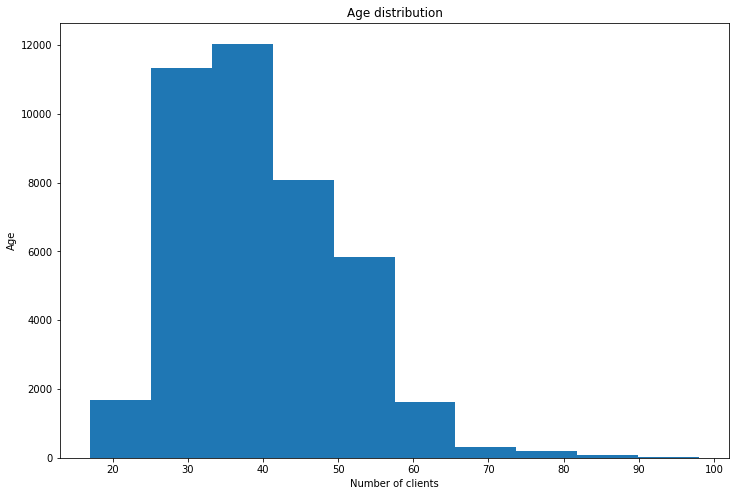

In [187]:
#AGE
bank.age.plot(kind='hist', figsize=(12,8))
plt.ylabel('Age')
plt.xlabel('Number of clients')
plt.title('Age distribution')

#Most calls are placed to customers between ages of 20- 40

Text(0.5, 1.0, 'Count of clients for each marital status')

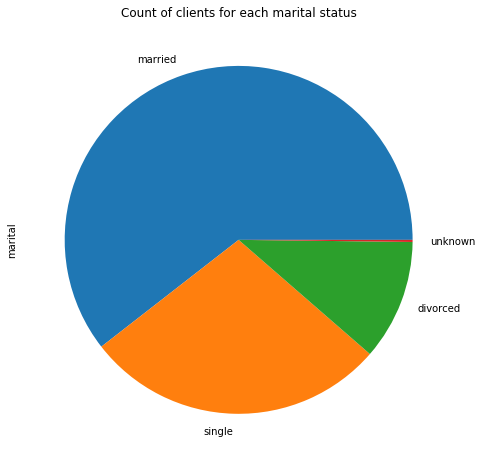

In [188]:
#MARITAL -Majority clients are married 
bank.marital.value_counts().sort_values(ascending=False).plot(kind='pie', figsize=(12,8), x='marital status', y='Count');
plt.title('Count of clients for each marital status')

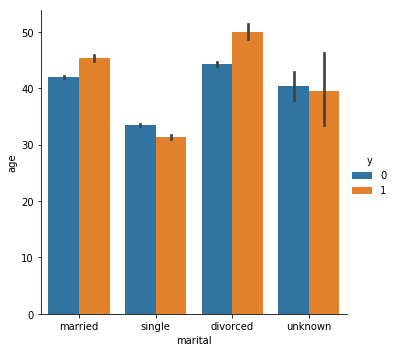

In [189]:
sns.catplot(x='marital', y='age', kind='bar', hue='y', data=bank)

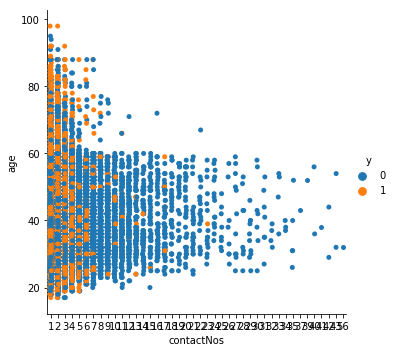

In [198]:
sns.catplot(x='contactNos', y='age', hue='y', data=bank)
# contacting customers multiple times did not help in getting deposits

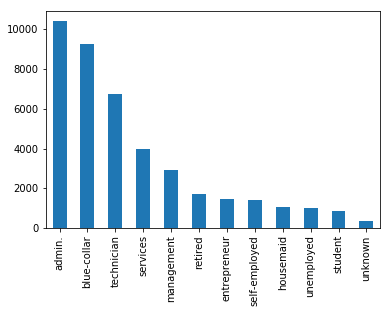

In [199]:
#JOB - majority clients are either in - admin, blue collar or technician 
bank.job.value_counts().sort_values(ascending=False).plot(kind='bar');

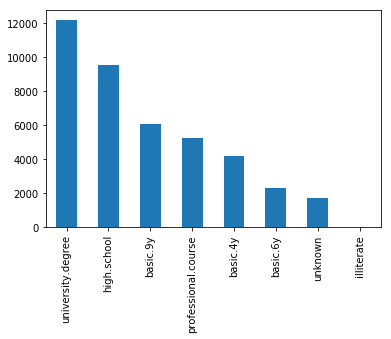

In [193]:
#Education 
#bank.groupby('y')['education'].value_counts().plot(kind='bar')
bank.education.value_counts().sort_values(ascending=False).plot(kind='bar');

1.2 Some analysis in campaign contact

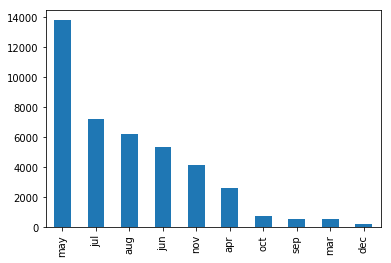

In [187]:
bank.contact_month.value_counts().plot(kind='bar');
#most contacts done in months of May and June 

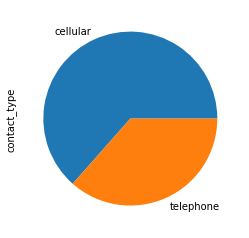

In [240]:
bank.contact_type.value_counts().plot(kind ='pie')
# 25000 contacted through at cell and 15000 through telephone 

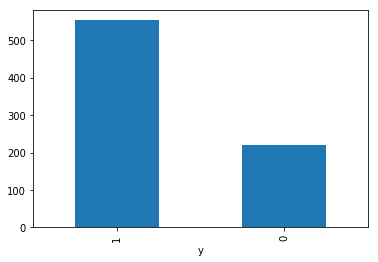

In [253]:
bank.groupby('y')['call_duration'].mean().sort_values(ascending=False).plot(kind='bar')

In [289]:
#bank.groupby('default')['housing_loan','personalloan'].sum()
pd.crosstab(bank.housing_loan, bank.personalloan)

personalloan,no,unknown,yes
housing_loan,,,
no,16065,0,2557
unknown,0,990,0
yes,17885,0,3691


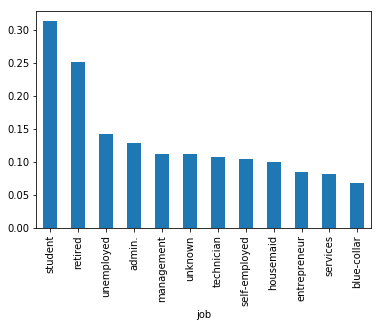

In [189]:
bank.groupby('job')['y'].mean().sort_values(ascending=False).plot(kind='bar')

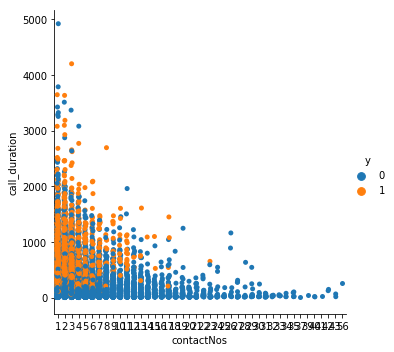

In [249]:
sns.catplot(x='contactNos', y= 'call_duration', hue='y', data=bank)

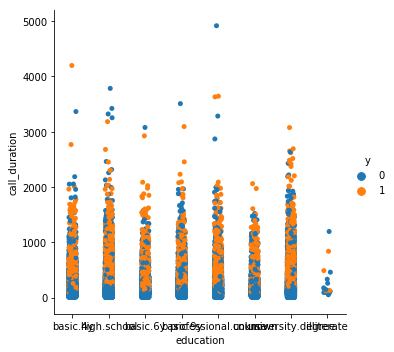

In [68]:
sns.catplot(x='education', y='call_duration', hue='y', data=bank)
# the orange dots start a level above 0, seems a threshold for min. call duration to improve chances of a deposit 

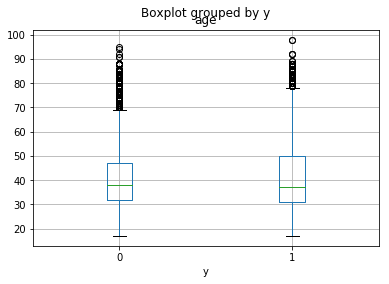

In [273]:
bank.boxplot(column ='age', by='y');

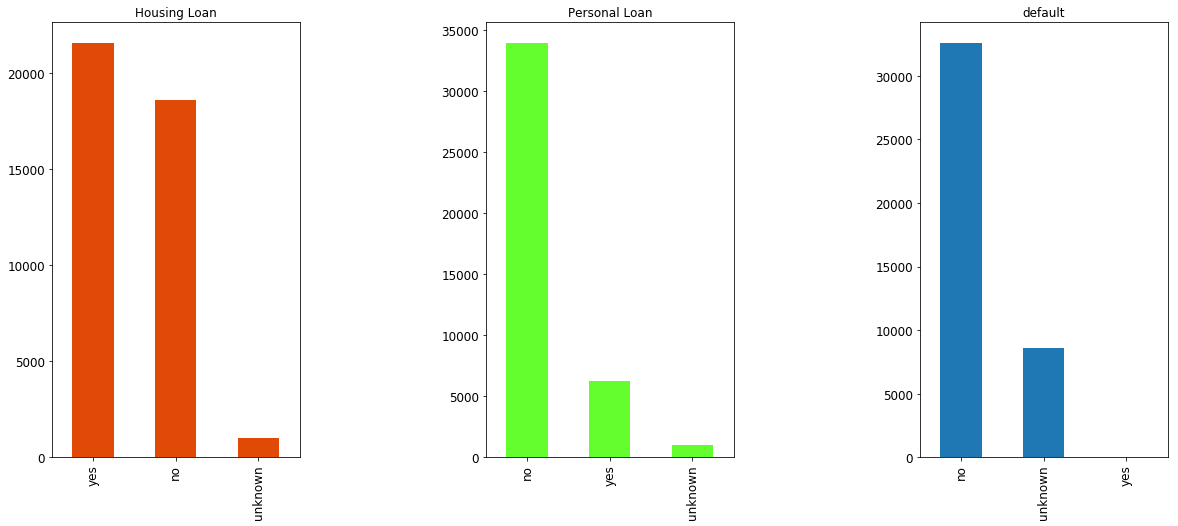

In [213]:
fig, ax = plt.subplots(1, 3, figsize= (20,8))
bank.housing_loan.value_counts().plot(kind='bar', ax=ax[0], color='#E14906', title='Housing Loan', fontsize=12)
bank.personalloan.value_counts().plot( kind='bar', ax=ax[1], color='#64FE2E', title='Personal Loan', fontsize=12)
bank.default.value_counts().plot( kind='bar', ax=ax[2], title='default', fontsize=12)
plt.subplots_adjust(wspace=0.75)

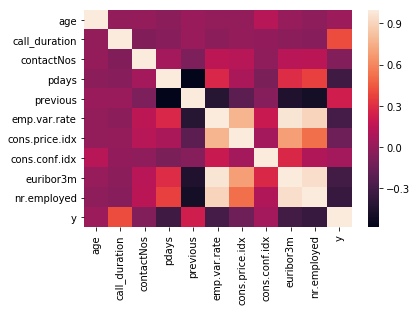

In [228]:
sns.heatmap(bank.corr())

# EDA conclusion/ takeaways:
- Most customers are married and are aged between 25-45
- 35k out of 41k are first time customers 
- most of them are reachable at cellular 
- customers with no stable income flow - students, retired, unemployed form majority of customers 
- min threshold for call duration exists - yet to be identified ( approx. 100-200 seconds)
- age does not help in success of the campaign, neither does existence of a loan

# Categorical variables - OneHotEncoding

In [200]:
#bank2=pd.get_dummies(data=bank)
bank2 = pd.get_dummies(data = bank, drop_first=True)

In [201]:
bank2.head()

,age,call_duration,contactNos,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,contact_month_may,contact_month_nov,contact_month_oct,contact_month_sep,contact_day_mon,contact_day_thu,contact_day_tue,contact_day_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [202]:
bank2.shape
#data does not have more cols than rows 

(41188, 54)

In [81]:
#bank2_cols=bank2.columns.tolist()

In [203]:
bank2.columns

Index(['age', 'call_duration', 'contactNos', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_loan_unknown', 'housing_loan_yes',
       'personalloan_unknown', 'personalloan_yes', 'contact_type_telephone',
       'contact_month_aug', 'contact_month_dec', 'contact_month_jul',
       'contact_month_jun', 'contact_month_mar', 'contact_month_may',
       'contact_month_nov', 'contact_month_oct', 'contact_month_se

In [204]:
x = bank2.loc[:, bank2.columns != 'y']
y = bank2['y']

In [205]:
x.columns

Index(['age', 'call_duration', 'contactNos', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_loan_unknown', 'housing_loan_yes',
       'personalloan_unknown', 'personalloan_yes', 'contact_type_telephone',
       'contact_month_aug', 'contact_month_dec', 'contact_month_jul',
       'contact_month_jun', 'contact_month_mar', 'contact_month_may',
       'contact_month_nov', 'contact_month_oct', 'contact_month_sep',
 

In [206]:
X = (x - x.mean()) / x.std()

# Part 3 - The Model

# 1 ) Training & Testing 

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [208]:
X_train.shape

(32950, 53)

In [209]:
y_train.shape

(32950,)

In [210]:
X_test.shape

(8238, 53)

In [211]:
y_test.shape

(8238,)

# 2) Cross Validation

In [212]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [213]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=logreg, X=X_train, y=y_train, cv=10)

In [214]:
np.mean(scores)

0.9106828528072837

# 3) Logistic Regression 

In [215]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [216]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [217]:
print("Training score: ", logreg.score(X_train, y_train), "Test score: ", logreg.score(X_test, y_test))

Training score:  0.9116236722306525 Test score:  0.911750424860403


CONCLUSION : model is neither overfitted nor underfitted. test set can be used for prediction

In [218]:
logreg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [219]:
logreg.score(X_train, y_train)

0.9116236722306525

In [220]:
logreg.score(X_test, y_test)
# model has 91% accuracy 

0.911750424860403

In [221]:
y_test.mean()
# as per the actual dataset, 11.2% of customer made a deposit

0.11167759164845836

In [222]:
bank.y.mean()

0.11265417111780131

In [173]:
np.mean(logreg.predict_proba(X_test)[:, 1])

0.10983525184935324

In [223]:
logreg.intercept_

array([-3.12388831])

In [224]:
logreg.coef_

array([[ 9.97025426e-03,  1.21618855e+00, -1.12346351e-01,
        -1.88640668e-01, -3.40561932e-02, -2.51140320e+00,
         1.14278690e+00,  8.93690318e-02,  5.14946238e-01,
         2.77240786e-01, -7.56252441e-02, -3.36740354e-02,
        -5.66533320e-03, -1.84322591e-02,  5.28727219e-02,
        -1.19801575e-02, -5.64727718e-02,  1.16646504e-02,
        -1.17649700e-02,  2.45860365e-03, -1.25434187e-02,
         1.75804932e-02,  4.55891675e-02,  1.16467067e-02,
         1.41059875e-02, -9.02540060e-03,  3.87885437e-02,
         3.05647426e-02,  4.62350493e-02,  8.88640960e-02,
         3.22797305e-02, -1.16649858e-01, -3.49702713e-02,
        -5.55563277e-03,  1.06389919e-02, -5.55563277e-03,
        -2.28163534e-02, -3.03953251e-01,  3.08696939e-01,
         1.71909844e-02,  5.85443910e-02, -1.38850243e-01,
         2.23974130e-01, -2.11776239e-01, -1.05525089e-01,
         3.60181242e-02,  4.64327922e-02, -4.04201225e-02,
         1.98157565e-02,  3.99489707e-02,  5.98830264e-0

In [225]:
output = X_train.dot(logreg.coef_.T) + logreg.intercept_
output

,0
9917,-4.371379
23224,-3.561128
24883,-4.383361
27029,-2.922920
9709,-4.289238
9014,-3.845724
13117,-4.102263
16276,-3.983875
23208,-3.482398
2705,-4.088016


In [226]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
predictions = sigmoid(output)

In [227]:
logreg.coef_.T

array([[ 9.97025426e-03],
       [ 1.21618855e+00],
       [-1.12346351e-01],
       [-1.88640668e-01],
       [-3.40561932e-02],
       [-2.51140320e+00],
       [ 1.14278690e+00],
       [ 8.93690318e-02],
       [ 5.14946238e-01],
       [ 2.77240786e-01],
       [-7.56252441e-02],
       [-3.36740354e-02],
       [-5.66533320e-03],
       [-1.84322591e-02],
       [ 5.28727219e-02],
       [-1.19801575e-02],
       [-5.64727718e-02],
       [ 1.16646504e-02],
       [-1.17649700e-02],
       [ 2.45860365e-03],
       [-1.25434187e-02],
       [ 1.75804932e-02],
       [ 4.55891675e-02],
       [ 1.16467067e-02],
       [ 1.41059875e-02],
       [-9.02540060e-03],
       [ 3.87885437e-02],
       [ 3.05647426e-02],
       [ 4.62350493e-02],
       [ 8.88640960e-02],
       [ 3.22797305e-02],
       [-1.16649858e-01],
       [-3.49702713e-02],
       [-5.55563277e-03],
       [ 1.06389919e-02],
       [-5.55563277e-03],
       [-2.28163534e-02],
       [-3.03953251e-01],
       [ 3.0

In [252]:
coeffs = pd.DataFrame({
    'Variable': X_train.columns,
    'Weight'  : logreg.coef_[0]
}).sort_values(by='Weight', ascending=False)

coeffs

,Variable,Weight
1,call_duration,1.216189
6,cons.price.idx,1.142787
8,euribor3m,0.514946
38,contact_month_aug,0.308697
9,nr.employed,0.277241
42,contact_month_mar,0.223974
52,poutcome_success,0.150901
51,poutcome_nonexistent,0.146772
7,cons.conf.idx,0.089369
29,education_university.degree,0.088864


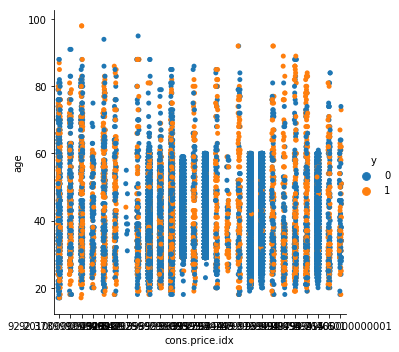

In [260]:
sns.catplot(y='age', x='cons.price.idx', hue='y', data=bank2)

In [229]:
abs_vals = np.abs(logreg.coef_[0])
importances = abs_vals / abs_vals.sum()

sorted(importances.cumsum())

[0.0011291759798636124,
 0.13886797989513516,
 0.1515917076398071,
 0.1729561087054944,
 0.17681312522074563,
 0.4612407931733825,
 0.5906665311003755,
 0.6007879744892138,
 0.6591079438353462,
 0.6905067053891344,
 0.69907160322522,
 0.7028853386516172,
 0.7035269630276882,
 0.7056144989763646,
 0.7116025717031014,
 0.7129593782326411,
 0.719355172743579,
 0.7206762466824178,
 0.7220086822629577,
 0.7222871301454592,
 0.7237077285367898,
 0.7256987981833276,
 0.7308619757263223,
 0.7321810174553489,
 0.7337785837624321,
 0.7348007508308217,
 0.7391937272550351,
 0.7426553213377091,
 0.7478916478933202,
 0.7579559050453617,
 0.761611729193183,
 0.7748228484686407,
 0.7787833884288978,
 0.7794125887399871,
 0.7806175022530428,
 0.7812467025641321,
 0.7838307568494091,
 0.8182548248402888,
 0.8532161367636942,
 0.8551630927936934,
 0.8617935074655285,
 0.8775189197950853,
 0.9028849938266936,
 0.9268696020188625,
 0.9388207913233638,
 0.9429000053184523,
 0.9481587271445504,
 0.952736487

# Improving the model

In [230]:
bank2.columns

Index(['age', 'call_duration', 'contactNos', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_loan_unknown', 'housing_loan_yes',
       'personalloan_unknown', 'personalloan_yes', 'contact_type_telephone',
       'contact_month_aug', 'contact_month_dec', 'contact_month_jul',
       'contact_month_jun', 'contact_month_mar', 'contact_month_may',
       'contact_month_nov', 'contact_month_oct', 'contact_month_se

In [177]:
#bank3 = bank2.drop(['age', 'job_unemployed', 'housing_loan_unknown', 'personalloan_unknown', 'job_housemaid'], axis=1)

In [231]:
x2 = bank2.loc[:, bank2.columns != 'y']
y2 = bank2['y']

In [232]:
X2 = (x2 - x2.mean()) / x2.std()

In [240]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 2)

In [241]:
logreg.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [242]:
print("Training score: ", logreg.score(X_train, y_train), "Test score: ", logreg.score(X_test, y_test))

Training score:  0.9116236722306525 Test score:  0.911750424860403


# Decision Trees

In [236]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=2, max_depth=4)

In [243]:
tree.get_params()

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 2,
 'splitter': 'best'}

In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [321]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [244]:
from sklearn.model_selection import cross_val_score

rf_scores = []

min_samples_leaf = [1, 5, 10, 25, 50]

for leaf_number in min_samples_leaf:
    tree.set_params(min_samples_leaf=leaf_number)
    scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=10)
    rf_scores.append((np.mean(scores), leaf_number))

In [245]:
rf_scores

[(0.38946615338602497, 1),
 (0.38975563955720044, 5),
 (0.38929338530439345, 10),
 (0.38916186921626644, 25),
 (0.38965322596759927, 50)]